In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv('insurance.csv')

## Task 1 — Business Understanding
#### Identify:
#### The target variable (company’s financial concern)
#### The input variables related to customer risk
#### Explain how your regression model helps the company control rising costs, not just predict them.

In [5]:
X = data.drop('charges',axis=1).values
y = data['charges'].values


## Task 2 — Data Inspection
#### Explore the dataset and:
#### Separate numeric and categorical columns
#### Identify columns that are not directly usable in regression
#### Report any data quality issues you observe.

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))

Numeric Columns: ['age', 'bmi', 'children', 'charges']
Categorical Columns: ['sex', 'smoker', 'region']


In [9]:
# Duplicate rows
data.duplicated().sum()

np.int64(1)

## Task 3 — Data Cleaning & Encoding
#### Convert categorical variables into numeric form.
#### Decide how to handle:
#### Region information
#### Binary attributes like lifestyle indicators
#### Justify each transformation from a business and modeling perspective.

In [10]:
# Encode Binary Categorical Variables
data['sex'] = data['sex'].map({'male':1, 'female':0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [11]:
# Encode Region (One-Hot Encoding)
data = pd.get_dummies(data, columns=['region'])

In [12]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


## Task 4 — Feature Scaling & Comparability
#### Observe differences in value ranges among numeric features.
#### Explain why scaling is important when comparing regression coefficients.
#### Prepare the data so the effect of each variable can be fairly interpreted.

In [13]:
# Separate Features and Target
X = data.drop(columns=['charges']) # features
y = data['charges'] # target

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()


,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.565267,1.765481,-0.611324,-0.566418


### Task 5 — The Hidden Trap (Multicollinearity)
#### Analyze relationships between independent variables.
#### Identify any highly correlated features (example: age, BMI, and lifestyle habits).
#### Explain:
#### Why multicollinearity is a problem in Multiple Linear Regression
#### How it can confuse business decision-making
#### Take appropriate steps to fix the issue.

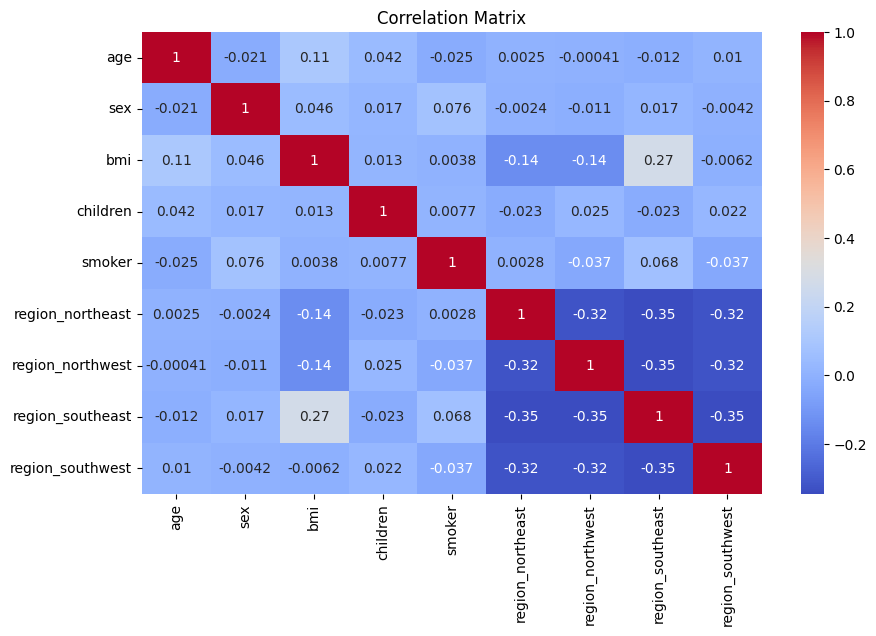

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(X_scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df["Feature"] = X_scaled_df.columns
vif_df["VIF"] = [
    variance_inflation_factor(X_scaled_df.values, i)
    for i in range(X_scaled_df.shape[1])
]

vif_df


c:\Users\srini\OneDrive\Desktop\PythonTechworks\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,age,1.016822
1,sex,1.008900
2,bmi,1.106630
3,children,1.004011
4,smoker,1.012074
5,region_northeast,inf
6,region_northwest,inf
7,region_southeast,inf
8,region_southwest,inf


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Train model
model = LinearRegression()
model.fit(X, y)

# Coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coeff_df.sort_values(by="Coefficient", ascending=False))

# Predictions
y_pred = model.predict(X)

# Metrics
print("R2 Score:", r2_score(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))


            Feature   Coefficient
4            smoker  23848.534542
5  region_northeast    587.009235
3          children    475.500545
2               bmi    339.193454
0               age    256.856353
6  region_northwest    234.045336
1               sex   -131.314359
8  region_southwest   -373.041756
7  region_southeast   -448.012814
R2 Score: 0.7509130345985207
RMSE: 6041.6796511744515


## Task 6 — Build the Multiple Linear Regression Model
#### Build a Multiple Linear Regression model using the prepared dataset.
#### Ensure the model is:
#### Interpretable
#### Stable
#### Suitable for explaining customer cost behavior

In [18]:
# Task 6: Build Multiple Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# 1. Initialize the model
mlr_model = LinearRegression()

# 2. Train the model
mlr_model.fit(X, y)

# 3. Extract coefficients for interpretability
coefficients_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": mlr_model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("Model Coefficients:")
print(coefficients_df)

# 4. Make predictions
y_pred = mlr_model.predict(X)

# 5. Evaluate model performance
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("\nModel Performance:")
print("R² Score:", r2)
print("RMSE:", rmse)


Model Coefficients:
            Feature   Coefficient
4            smoker  23848.534542
5  region_northeast    587.009235
3          children    475.500545
2               bmi    339.193454
0               age    256.856353
6  region_northwest    234.045336
1               sex   -131.314359
8  region_southwest   -373.041756
7  region_southeast   -448.012814

Model Performance:
R² Score: 0.7509130345985207
RMSE: 6041.6796511744515
